In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('cleaned_5250.csv')

In [4]:
df

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


In [5]:
df.describe()

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
count,5233.000000,5089.000000,5250.000000,5227.000000,5233.000000,4961.000000,5.250000e+03,5250.000000
mean,2167.168737,12.683738,2015.732190,6.434812,1.015121,6.962942,4.791509e+02,0.063568
std,3245.522087,3.107571,4.307336,12.972727,0.603479,138.673600,1.680445e+04,0.141424
min,4.000000,0.872000,1992.000000,0.020000,0.200000,0.004400,2.737851e-04,-0.520000
25%,389.000000,10.939000,2014.000000,1.804000,0.325000,0.053000,1.259411e-02,0.000000
50%,1371.000000,13.543000,2016.000000,4.170140,1.120000,0.102800,3.449692e-02,0.000000
75%,2779.000000,15.021000,2018.000000,8.000000,1.410000,0.286000,1.442163e-01,0.060000
max,27727.000000,44.610000,2023.000000,752.000000,6.900000,7506.000000,1.101370e+06,0.950000


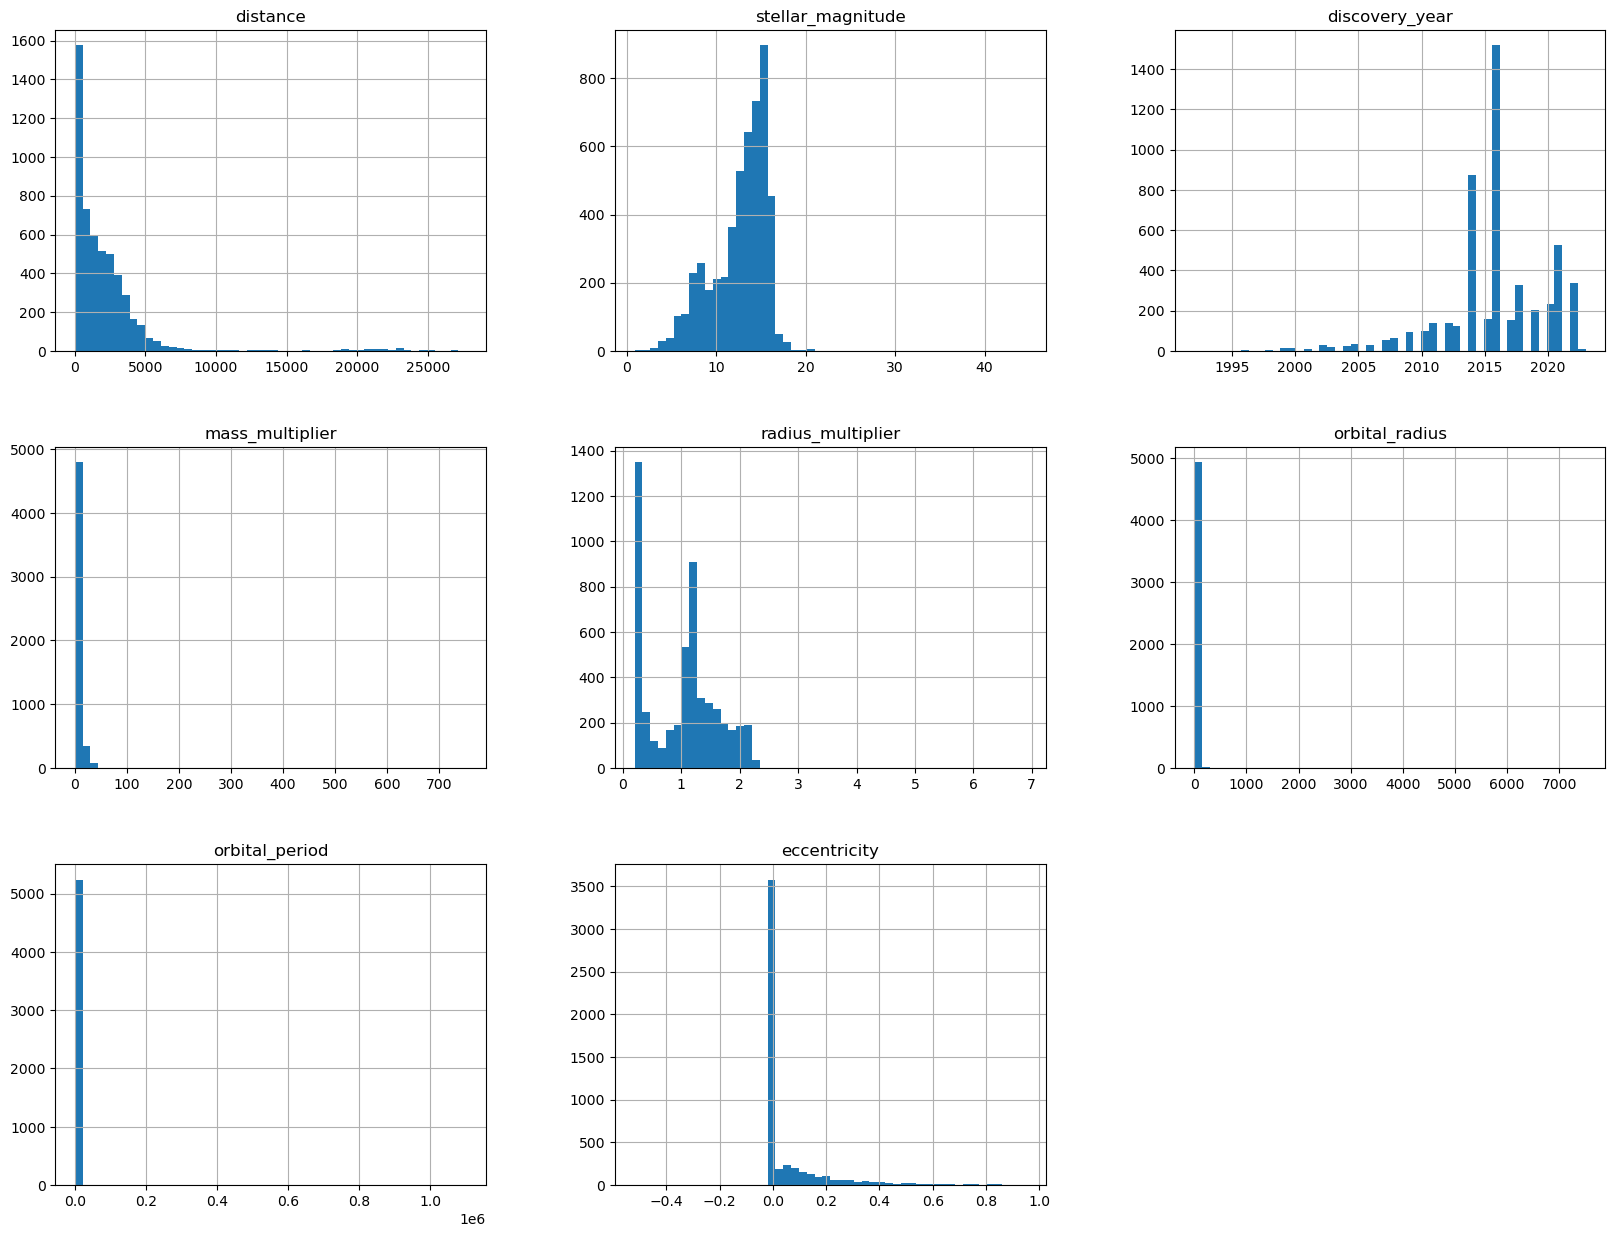

In [6]:
df.hist(bins=50,figsize=(20,15))
plt.show()

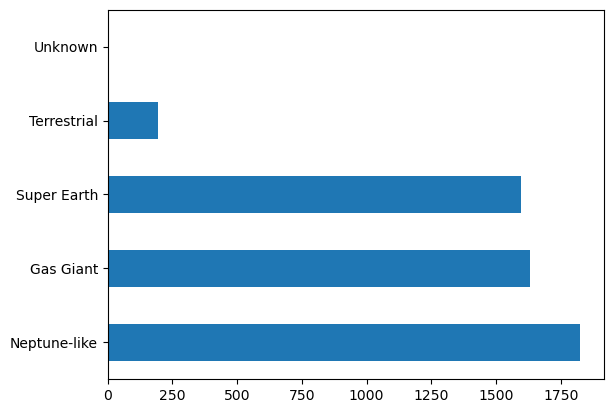

In [7]:
df['planet_type'].value_counts().plot.barh();

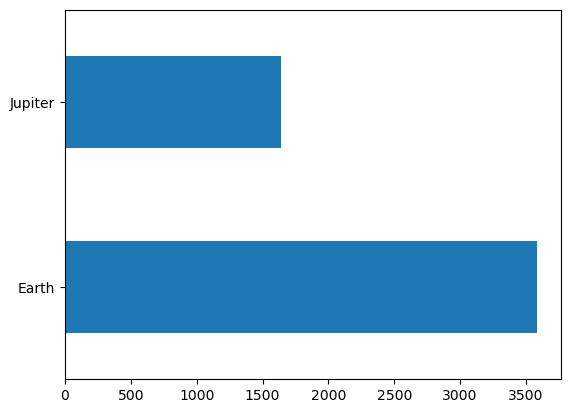

In [8]:
df['mass_wrt'].value_counts().plot.barh();

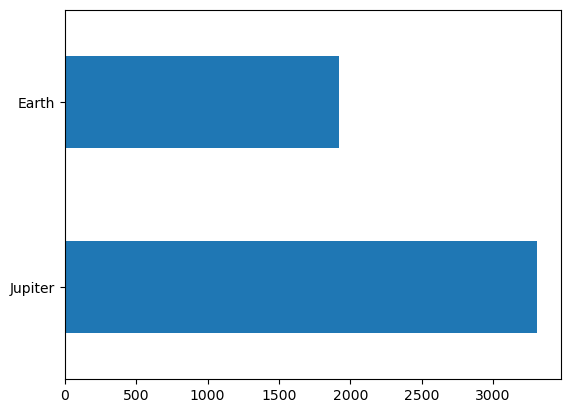

In [9]:
df['radius_wrt'].value_counts().plot.barh();

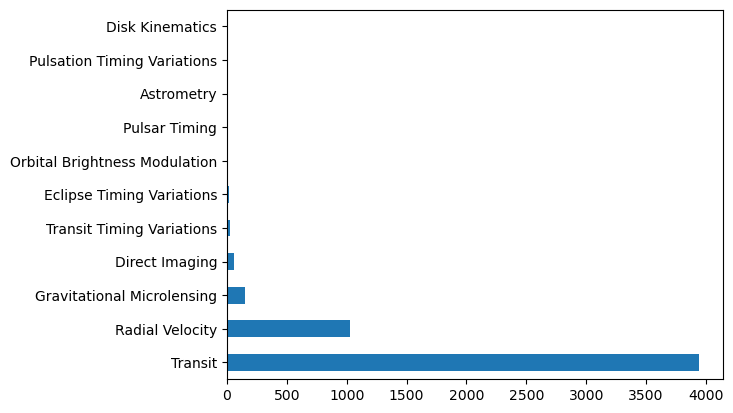

In [10]:
df['detection_method'].value_counts().plot.barh();

<AxesSubplot:xlabel='distance', ylabel='discovery_year'>

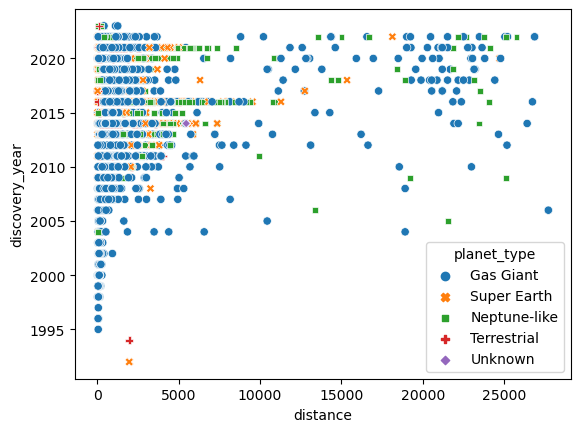

In [11]:
sns.scatterplot(x='distance',y='discovery_year',hue='planet_type',style='planet_type',data=df)

In [12]:
df.isnull().sum()

name                   0
distance              17
stellar_magnitude    161
planet_type            0
discovery_year         0
mass_multiplier       23
mass_wrt              23
radius_multiplier     17
radius_wrt            17
orbital_radius       289
orbital_period         0
eccentricity           0
detection_method       0
dtype: int64

In [13]:
newdf=df.dropna()
newdf

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


In [14]:
x=newdf.drop(['name','planet_type','mass_wrt','radius_wrt','detection_method'], axis=1)
dum=newdf[['name','mass_wrt','radius_wrt','detection_method']]
dum=pd.get_dummies(dum)
X=pd.concat([x,dum],axis=1)
Y=newdf[['planet_type']]

In [15]:
X

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity,name_11 Comae Berenices b,name_11 Ursae Minoris b,...,detection_method_Direct Imaging,detection_method_Disk Kinematics,detection_method_Eclipse Timing Variations,detection_method_Gravitational Microlensing,detection_method_Orbital Brightness Modulation,detection_method_Pulsar Timing,detection_method_Pulsation Timing Variations,detection_method_Radial Velocity,detection_method_Transit,detection_method_Transit Timing Variations
0,304.0,4.72307,2007,19.40000,1.080,1.290000,0.892539,0.23,1,0,...,0,0,0,0,0,0,0,1,0,0
1,409.0,5.01300,2009,14.74000,1.090,1.530000,1.400000,0.08,0,1,...,0,0,0,0,0,0,0,1,0,0
2,246.0,5.23133,2008,4.80000,1.150,0.830000,0.508693,0.00,0,0,...,0,0,0,0,0,0,0,1,0,0
3,58.0,6.61935,2002,8.13881,1.120,2.773069,4.800000,0.37,0,0,...,0,0,0,0,0,0,0,1,0,0
4,69.0,6.21500,1996,1.78000,1.200,1.660000,2.200000,0.68,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,764.0,10.52100,2019,0.70900,1.373,0.044210,0.007940,0.04,0,0,...,0,0,0,0,0,0,0,0,1,0
5246,357.0,10.88500,2021,6.30000,1.140,115.000000,1176.500000,0.00,0,0,...,1,0,0,0,0,0,0,0,0,0
5247,12.0,12.07400,2017,0.70000,0.913,0.016340,0.005476,0.06,0,0,...,0,0,0,0,0,0,0,1,0,0
5248,12.0,12.07400,2017,1.14000,1.050,0.021560,0.008487,0.00,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
Y

,planet_type
0,Gas Giant
1,Gas Giant
2,Gas Giant
3,Gas Giant
4,Gas Giant
...,...
5245,Gas Giant
5246,Gas Giant
5247,Terrestrial
5248,Super Earth


In [17]:
X.columns

Index(['distance', 'stellar_magnitude', 'discovery_year', 'mass_multiplier',
       'radius_multiplier', 'orbital_radius', 'orbital_period', 'eccentricity',
       'name_11 Comae Berenices b', 'name_11 Ursae Minoris b',
       ...
       'detection_method_Direct Imaging', 'detection_method_Disk Kinematics',
       'detection_method_Eclipse Timing Variations',
       'detection_method_Gravitational Microlensing',
       'detection_method_Orbital Brightness Modulation',
       'detection_method_Pulsar Timing',
       'detection_method_Pulsation Timing Variations',
       'detection_method_Radial Velocity', 'detection_method_Transit',
       'detection_method_Transit Timing Variations'],
      dtype='object', length=4788)

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [19]:
xtrain

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity,name_11 Comae Berenices b,name_11 Ursae Minoris b,...,detection_method_Direct Imaging,detection_method_Disk Kinematics,detection_method_Eclipse Timing Variations,detection_method_Gravitational Microlensing,detection_method_Orbital Brightness Modulation,detection_method_Pulsar Timing,detection_method_Pulsation Timing Variations,detection_method_Radial Velocity,detection_method_Transit,detection_method_Transit Timing Variations
396,1673.0,14.052,2015,1.071,1.039,0.03815,0.007666,0.142,0,0,...,0,0,0,0,0,0,0,0,1,0
4259,2068.0,16.211,2016,4.740,2.020,0.08620,0.036413,0.000,0,0,...,0,0,0,0,0,0,0,0,1,0
337,1190.0,11.937,2010,1.340,1.090,0.02320,0.003285,0.110,0,0,...,0,0,0,0,0,0,0,0,1,0
1060,114.0,8.170,2019,14.310,0.346,0.38090,0.262560,0.140,0,0,...,0,0,0,0,0,0,0,1,0,0
420,2866.0,12.745,2018,0.630,1.570,0.06007,0.012594,0.275,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4885,139.0,10.000,2021,2.570,1.258,0.00812,0.001369,0.000,0,0,...,0,0,0,0,0,0,0,0,1,0
505,127.0,6.990,2002,0.261,0.973,0.10200,0.029843,0.530,0,0,...,0,0,0,0,0,0,0,1,0,0
3334,3366.0,15.944,2014,7.320,0.233,0.21300,0.102669,0.000,0,0,...,0,0,0,0,0,0,0,0,1,0
4026,3178.0,13.762,2016,4.940,2.070,0.11160,0.037509,0.000,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
xtest

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity,name_11 Comae Berenices b,name_11 Ursae Minoris b,...,detection_method_Direct Imaging,detection_method_Disk Kinematics,detection_method_Eclipse Timing Variations,detection_method_Gravitational Microlensing,detection_method_Orbital Brightness Modulation,detection_method_Pulsar Timing,detection_method_Pulsation Timing Variations,detection_method_Radial Velocity,detection_method_Transit,detection_method_Transit Timing Variations
1019,42.0,7.170000,2013,5.20,2.130,0.2470,0.141821,0.020,0,0,...,0,0,0,0,0,0,0,1,0,0
3598,209.0,9.770001,2013,12.20,1.940,0.2076,0.108966,0.150,0,0,...,0,0,0,0,0,0,0,0,1,0
2829,4163.0,15.273000,2021,9.36,0.269,0.0956,0.027652,0.000,0,0,...,0,0,0,0,0,0,0,0,1,0
4226,4758.0,15.730000,2016,4.38,1.930,0.0550,0.012594,0.000,0,0,...,0,0,0,0,0,0,0,0,1,0
640,77.0,6.479330,2015,5.59,2.230,0.1117,0.036961,0.305,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,184.0,8.990000,2009,2.43,1.180,3.4300,6.700000,0.080,0,0,...,0,0,0,0,0,0,0,1,0,0
2100,3352.0,14.403000,2014,6.08,0.209,0.0640,0.015880,0.000,0,0,...,0,0,0,0,0,0,0,0,1,0
4423,1873.0,14.204000,2016,7.04,0.227,0.1245,0.046270,0.000,0,0,...,0,0,0,0,0,0,0,0,1,0
2890,2239.0,13.228000,2021,4.10,1.856,0.0455,0.010130,0.000,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
ytrain

,planet_type
396,Gas Giant
4259,Super Earth
337,Gas Giant
1060,Neptune-like
420,Gas Giant
...,...
4885,Super Earth
505,Gas Giant
3334,Neptune-like
4026,Super Earth


In [22]:
ytest

,planet_type
1019,Neptune-like
3598,Neptune-like
2829,Neptune-like
4226,Super Earth
640,Neptune-like
...,...
963,Gas Giant
2100,Neptune-like
4423,Neptune-like
2890,Super Earth


In [23]:
sc=StandardScaler()

In [24]:
Xtrain=sc.fit_transform(xtrain)
Xtest=sc.transform(xtest)

In [25]:
Xtrain

array([[-0.0676682 ,  0.42288789, -0.11760405, ..., -0.49812523,
         0.53215208, -0.06255642],
       [ 0.15059907,  1.11676843,  0.1190945 , ..., -0.49812523,
         0.53215208, -0.06255642],
       [-0.33456209, -0.25685149, -1.30109681, ..., -0.49812523,
         0.53215208, -0.06255642],
       ...,
       [ 0.86784188,  1.03095736, -0.3543026 , ..., -0.49812523,
         0.53215208, -0.06255642],
       [ 0.76395771,  0.32968486,  0.1190945 , ..., -0.49812523,
         0.53215208, -0.06255642],
       [-0.70147212, -1.57037153,  1.53928582, ...,  2.00752731,
        -1.87916205, -0.06255642]])

In [26]:
Xtest

array([[-0.9689186 , -1.78891658, -0.59100115, ...,  2.00752731,
        -1.87916205, -0.06255642],
       [-0.87663851, -0.95330283, -0.59100115, ..., -0.49812523,
         0.53215208, -0.06255642],
       [ 1.30824443,  0.81530482,  1.30258727, ..., -0.49812523,
         0.53215208, -0.06255642],
       ...,
       [ 0.04284688,  0.47173914,  0.1190945 , ..., -0.49812523,
         0.53215208, -0.06255642],
       [ 0.24508945,  0.15806271,  1.30258727, ..., -0.49812523,
         0.53215208, -0.06255642],
       [-0.98052268, -2.30342627, -0.11760405, ...,  2.00752731,
        -1.87916205, -0.06255642]])

In [27]:
X.columns

Index(['distance', 'stellar_magnitude', 'discovery_year', 'mass_multiplier',
       'radius_multiplier', 'orbital_radius', 'orbital_period', 'eccentricity',
       'name_11 Comae Berenices b', 'name_11 Ursae Minoris b',
       ...
       'detection_method_Direct Imaging', 'detection_method_Disk Kinematics',
       'detection_method_Eclipse Timing Variations',
       'detection_method_Gravitational Microlensing',
       'detection_method_Orbital Brightness Modulation',
       'detection_method_Pulsar Timing',
       'detection_method_Pulsation Timing Variations',
       'detection_method_Radial Velocity', 'detection_method_Transit',
       'detection_method_Transit Timing Variations'],
      dtype='object', length=4788)

In [28]:
Y.columns

Index(['planet_type'], dtype='object')

In [29]:
xcols=np.array(X.columns).ravel()
ycols=np.array(Y.columns).ravel()

In [30]:
xcols

array(['distance', 'stellar_magnitude', 'discovery_year', ...,
       'detection_method_Radial Velocity', 'detection_method_Transit',
       'detection_method_Transit Timing Variations'], dtype=object)

In [31]:
ycols

array(['planet_type'], dtype=object)

In [32]:
Ytrain=ytrain.values
Ytest=ytest.values

In [33]:
X_train=pd.DataFrame(Xtrain,columns=xcols)
X_test=pd.DataFrame(Xtest,columns=xcols)
Y_train=pd.DataFrame(Ytrain,columns=ycols)
Y_train=Y_train['planet_type']
Y_test=pd.DataFrame(Ytest,columns=ycols)
Y_test=Y_test['planet_type']

In [34]:
X_train

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity,name_11 Comae Berenices b,name_11 Ursae Minoris b,...,detection_method_Direct Imaging,detection_method_Disk Kinematics,detection_method_Eclipse Timing Variations,detection_method_Gravitational Microlensing,detection_method_Orbital Brightness Modulation,detection_method_Pulsar Timing,detection_method_Pulsation Timing Variations,detection_method_Radial Velocity,detection_method_Transit,detection_method_Transit Timing Variations
0,-0.067668,0.422888,-0.117604,-0.355079,0.048181,-0.046162,-0.027264,0.549942,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,-0.498125,0.532152,-0.062556
1,0.150599,1.116768,0.119095,-0.114961,1.658357,-0.045850,-0.027263,-0.455256,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,-0.498125,0.532152,-0.062556
2,-0.334562,-0.256851,-1.301097,-0.337475,0.131890,-0.046259,-0.027265,0.323418,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,-0.498125,0.532152,-0.062556
3,-0.929133,-1.467527,0.829190,0.511348,-1.089283,-0.043935,-0.027252,0.535784,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,2.007527,-1.879162,-0.062556
4,0.591554,0.002831,0.592492,-0.383940,0.919744,-0.046020,-0.027264,1.491430,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,-0.498125,0.532152,-0.062556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,-0.915319,-0.879384,1.302587,-0.256977,0.407639,-0.046357,-0.027265,-0.455256,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,-0.498125,0.532152,-0.062556
3331,-0.921950,-1.846767,-3.194685,-0.408090,-0.060149,-0.045747,-0.027263,3.296539,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,2.007527,-1.879162,-0.062556
3332,0.867842,1.030957,-0.354303,0.053887,-1.274757,-0.045026,-0.027260,-0.455256,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,-0.498125,0.532152,-0.062556
3333,0.763958,0.329685,0.119095,-0.101872,1.740425,-0.045685,-0.027263,-0.455256,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,-0.498125,0.532152,-0.062556


In [35]:
X_test

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity,name_11 Comae Berenices b,name_11 Ursae Minoris b,...,detection_method_Direct Imaging,detection_method_Disk Kinematics,detection_method_Eclipse Timing Variations,detection_method_Gravitational Microlensing,detection_method_Orbital Brightness Modulation,detection_method_Pulsar Timing,detection_method_Pulsation Timing Variations,detection_method_Radial Velocity,detection_method_Transit,detection_method_Transit Timing Variations
0,-0.968919,-1.788917,-0.591001,-0.084857,1.838907,-0.044805,-0.027258,-0.313679,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,2.007527,-1.879162,-0.062556
1,-0.876639,-0.953303,-0.591001,0.373259,1.527048,-0.045061,-0.027259,0.606573,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,-0.498125,0.532152,-0.062556
2,1.308244,0.815305,1.302587,0.187395,-1.215668,-0.045789,-0.027263,-0.455256,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,-0.498125,0.532152,-0.062556
3,1.637027,0.962180,0.119095,-0.138522,1.510635,-0.046053,-0.027264,-0.455256,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,-0.498125,0.532152,-0.062556
4,-0.949578,-2.010891,-0.117604,-0.059333,2.003043,-0.045684,-0.027263,1.703796,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,2.007527,-1.879162,-0.062556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,-0.890453,-1.203987,-1.537795,-0.266139,0.279613,-0.024125,-0.026935,0.111053,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,2.007527,-1.879162,-0.062556
1426,0.860106,0.535696,-0.354303,-0.027265,-1.314150,-0.045994,-0.027264,-0.455256,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,-0.498125,0.532152,-0.062556
1427,0.042847,0.471739,0.119095,0.035562,-1.284605,-0.045601,-0.027262,-0.455256,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,-0.498125,0.532152,-0.062556
1428,0.245089,0.158063,1.302587,-0.156846,1.389174,-0.046114,-0.027264,-0.455256,-0.017319,-0.017319,...,-0.104462,-0.017319,-0.054841,-0.052019,-0.017319,-0.017319,-0.017319,-0.498125,0.532152,-0.062556


In [36]:
Y_train

0          Gas Giant
1        Super Earth
2          Gas Giant
3       Neptune-like
4          Gas Giant
            ...     
3330     Super Earth
3331       Gas Giant
3332    Neptune-like
3333     Super Earth
3334       Gas Giant
Name: planet_type, Length: 3335, dtype: object

In [37]:
Y_test

0       Neptune-like
1       Neptune-like
2       Neptune-like
3        Super Earth
4       Neptune-like
            ...     
1425       Gas Giant
1426    Neptune-like
1427    Neptune-like
1428     Super Earth
1429     Super Earth
Name: planet_type, Length: 1430, dtype: object

In [38]:
tree=DecisionTreeClassifier()
forest=RandomForestClassifier()
lr=LogisticRegression()
knn=KNeighborsClassifier()
gbm=GradientBoostingClassifier()

In [39]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [40]:
Y_tree=tree.predict(X_test)

In [41]:
Y_tree

array(['Neptune-like', 'Super Earth', 'Neptune-like', ..., 'Neptune-like',
       'Super Earth', 'Super Earth'], dtype=object)

In [42]:
print("Accuracy score of the decision tree classifier: ",accuracy_score(Y_test,Y_tree))

Accuracy score of the decision tree classifier:  0.9853146853146854


In [43]:
forest.fit(X_train,Y_train)

RandomForestClassifier()

In [44]:
Y_forest=forest.predict(X_test)

In [45]:
Y_forest

array(['Super Earth', 'Super Earth', 'Neptune-like', ..., 'Neptune-like',
       'Super Earth', 'Super Earth'], dtype=object)

In [46]:
print("Accuracy score of the random forest classifier: ",accuracy_score(Y_test,Y_forest))

Accuracy score of the random forest classifier:  0.9699300699300699


In [47]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [48]:
Y_log=lr.predict(X_test)

In [49]:
Y_log

array(['Super Earth', 'Super Earth', 'Neptune-like', ..., 'Neptune-like',
       'Super Earth', 'Super Earth'], dtype=object)

In [50]:
print("Accuracy score of the logistic regression: ",accuracy_score(Y_test,Y_log))

Accuracy score of the logistic regression:  0.9167832167832168


In [51]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [52]:
Y_knn=knn.predict(X_test)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [53]:
Y_knn

array(['Super Earth', 'Super Earth', 'Neptune-like', ..., 'Neptune-like',
       'Super Earth', 'Super Earth'], dtype=object)

In [54]:
print("Accuracy score of the K nearest neighbors: ",accuracy_score(Y_test,Y_knn))

Accuracy score of the K nearest neighbors:  0.9524475524475524


In [55]:
gbm.fit(X_train,Y_train)

GradientBoostingClassifier()

In [56]:
Y_gbm=gbm.predict(X_test)

In [57]:
print("Accuracy score of the gradient boosting classifier: ",accuracy_score(Y_test,Y_gbm))

Accuracy score of the gradient boosting classifier:  0.9818181818181818


In [58]:
models=['Decision Tree','Random Forest','Logistic Regression','K Nearest Neighbors','Gradient Boosting']
accuracy=[0.9853146853146854,0.9734265734265735,0.9167832167832168,0.9524475524475524,0.9818181818181818]

In [59]:
result=pd.DataFrame({'Model':models,'Accuracy':accuracy})

In [60]:
result

,Model,Accuracy
0,Decision Tree,0.985315
1,Random Forest,0.973427
2,Logistic Regression,0.916783
3,K Nearest Neighbors,0.952448
4,Gradient Boosting,0.981818


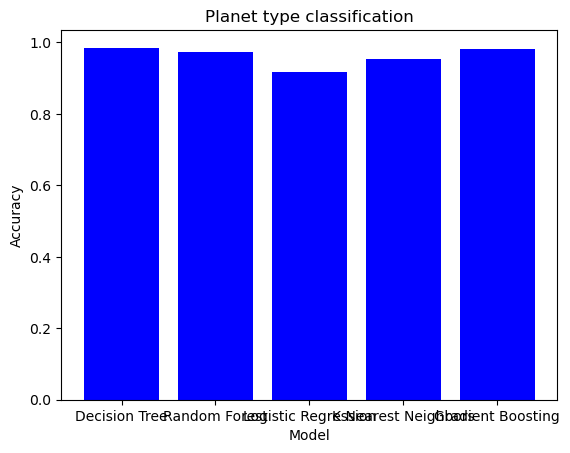

In [61]:
plt.bar(result['Model'],result['Accuracy'],color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Planet type classification')
plt.show()